## Linear Regression Model for Madrid Housing Prices





###  Library Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from math import sqrt


### Data Loading


In [ ]:
df = pd.read_csv("data_clean.csv")

In [3]:
df.shape

(73196, 38)

In [28]:
df.columns

Index(['ASSETID', 'PERIOD', 'PRICE', 'UNITPRICE', 'CONSTRUCTEDAREA',
       'ROOMNUMBER', 'BATHNUMBER', 'HASTERRACE', 'HASLIFT',
       'HASAIRCONDITIONING', 'HASPARKINGSPACE',
       'ISPARKINGSPACEINCLUDEDINPRICE', 'HASNORTHORIENTATION',
       'HASSOUTHORIENTATION', 'HASEASTORIENTATION', 'HASWESTORIENTATION',
       'HASBOXROOM', 'HASWARDROBE', 'HASSWIMMINGPOOL', 'HASDOORMAN',
       'HASGARDEN', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
       'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
       'CADASTRALQUALITYID', 'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3',
       'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO',
       'DISTANCE_TO_CASTELLANA', 'LONGITUDE', 'LATITUDE', 'DISTRICT',
       'DISTRICT_CODE'],
      dtype='object')

In [5]:
df.sample(10)

,ASSETID,PERIOD,PRICE,UNITPRICE,CONSTRUCTEDAREA,ROOMNUMBER,BATHNUMBER,HASTERRACE,HASLIFT,HASAIRCONDITIONING,...,BUILTTYPEID_1,BUILTTYPEID_2,BUILTTYPEID_3,DISTANCE_TO_CITY_CENTER,DISTANCE_TO_METRO,DISTANCE_TO_CASTELLANA,LONGITUDE,LATITUDE,DISTRICT,DISTRICT_CODE
64980,A13784938791775875940,201806,299000.0,6102.040816,49,1,1,0,1,0,...,0,0,1,2.942960,0.364459,0.466214,-3.697093,40.442531,Chamberi,5
49394,A2843817771020683607,201809,198000.0,2444.444444,81,3,1,0,1,0,...,0,0,1,5.445920,0.538092,5.570360,-3.760643,40.393806,Latina,9
52162,A11189917171968090090,201809,91000.0,1213.333333,75,3,1,1,0,1,...,0,0,1,5.143801,1.618357,2.665709,-3.667288,40.379679,Puente de Vallecas,12
43103,A10866655207959176928,201809,156000.0,1733.333333,90,2,1,1,0,0,...,0,0,1,3.553314,0.198254,4.218307,-3.743350,40.406026,Latina,9
967,A6946868000883529327,201803,395000.0,5486.111111,72,1,1,0,1,1,...,0,0,1,0.877020,0.172951,0.842350,-3.702932,40.408739,Centro,3
11056,A12948001582058162324,201803,244000.0,3253.333333,75,2,1,1,0,0,...,0,1,0,3.245733,0.178968,0.950959,-3.678635,40.438578,Salamanca,14
21285,A15451625111052951904,201809,768000.0,4800.000000,160,6,3,0,1,0,...,0,0,1,3.205617,0.140918,1.811188,-3.668426,40.426808,Salamanca,14
51161,A10342958549618153347,201812,425000.0,4569.892473,93,3,2,1,1,1,...,0,0,1,5.890544,0.261726,0.189027,-3.686337,40.467811,Chamartin,4
4395,A2454067451319467851,201803,856000.0,5522.580645,155,3,2,1,1,1,...,0,1,0,2.282943,0.197705,0.817712,-3.700667,40.436960,Chamberi,5
51251,A8492117704952024984,201812,426000.0,4391.752577,97,4,2,0,1,0,...,0,0,1,3.862975,0.142585,1.155247,-3.704436,40.451288,Tetuan,16


### Linear Regression with Cross-Validation

In [18]:
features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION',
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTRICT_CODE'
]
target = 'PRICE'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:,.2f}")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:,.2f}")


cv_scores = cross_val_score(model, scaler.transform(X), y, cv=5, scoring='neg_root_mean_squared_error')
cv_rmse = -cv_scores.mean()

print(f"Cross-validated RMSE (5 folds): {cv_rmse:,.2f}")

RMSE: 142,189.22
R² Score: 0.7938
MAE: 94,820.48
Cross-validated RMSE (5 folds): 145,195.37


#### Real vs Predicted Property Prices

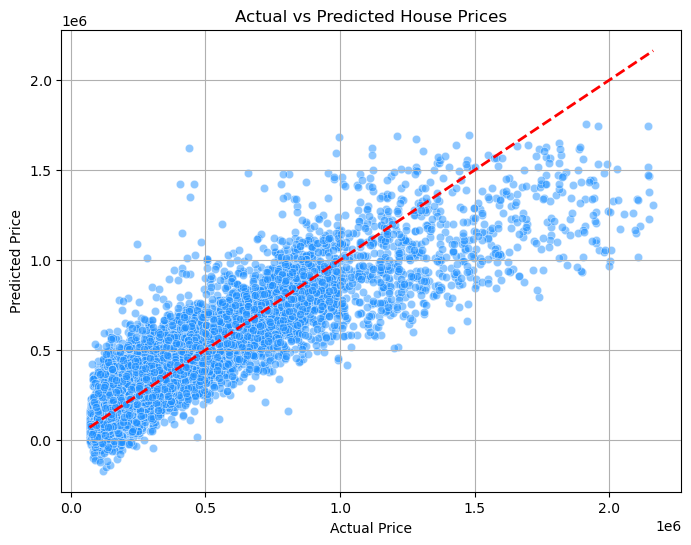

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # línea perfecta (y = y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

#### Distribution of Prediction Error Ranges (%) 

In [20]:
error_pct = np.abs((y_test - y_pred) / y_test) * 100

bins = [-np.inf, 5, 10, 15, 20, 25, 50, 100, np.inf]
labels = ['<=5%', '<=10%', '<=15%', '<=20%', '<=25%', '<=50%', '<=100%', '>100%']

error_ranges = pd.cut(error_pct, bins=bins, labels=labels)

percentages = error_ranges.value_counts(normalize=True).sort_index() * 100

result_df = pd.DataFrame({
    'Error Range': percentages.index,
    'Percentage of Predictions': percentages.values
})

result_df

,Error Range,Percentage of Predictions
0,<=5%,11.687158
1,<=10%,11.311475
2,<=15%,11.140710
3,<=20%,10.109290
4,<=25%,8.531421
5,<=50%,27.015027
6,<=100%,15.054645
7,>100%,5.150273


### Linear Regression Feature Importance: Top 15 Variables

🔹 Top 15 variables más importantes en regresión lineal:
                    Feature     Importance
0           CONSTRUCTEDAREA  222340.811488
2                BATHNUMBER   49844.820872
1                ROOMNUMBER   39328.776449
21   DISTANCE_TO_CASTELLANA   35822.811711
19  DISTANCE_TO_CITY_CENTER   32178.010339
22      CADCONSTRUCTIONYEAR   25181.834554
4                   HASLIFT   24619.279637
10               HASDOORMAN   21616.587853
11          HASSWIMMINGPOOL   16015.324679
5        HASAIRCONDITIONING   13382.284362
6                 HASGARDEN   11432.769144
12                 ISDUPLEX   10498.815998
3                HASTERRACE    9188.269281
13                 ISSTUDIO    7582.182143
24         CADDWELLINGCOUNT    5957.802906


C:\Users\marin\AppData\Local\Temp\ipykernel_35472\1742036948.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


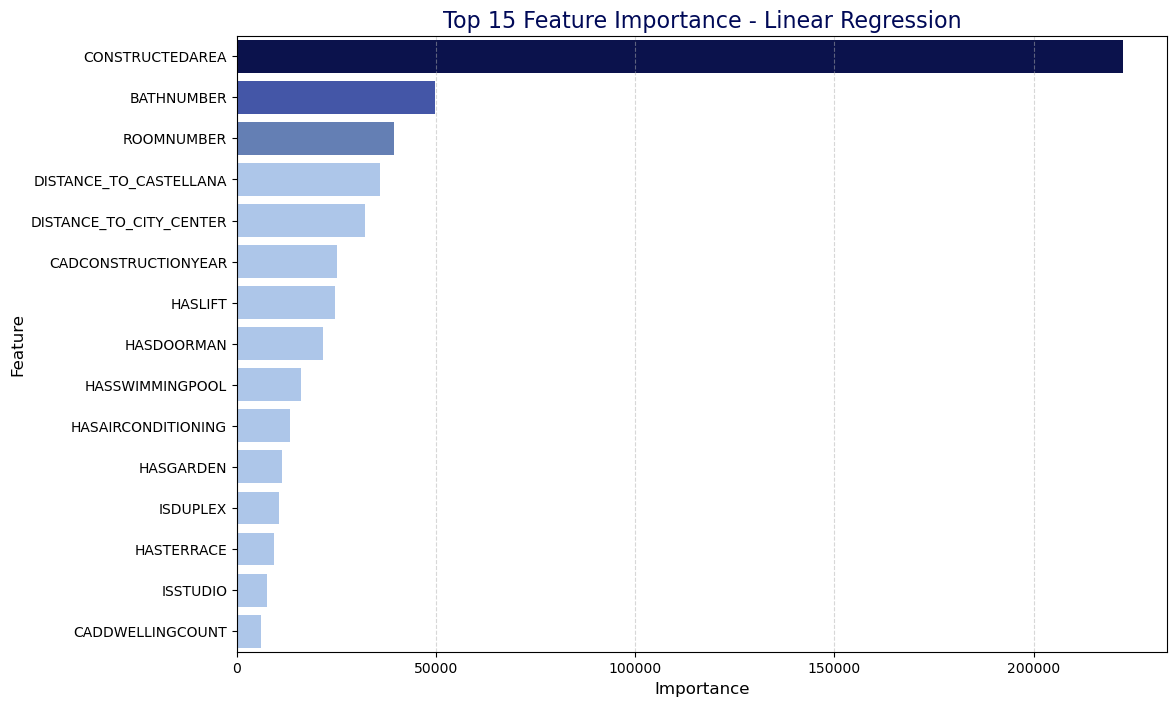

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

features = [
    'CONSTRUCTEDAREA', 'ROOMNUMBER', 'BATHNUMBER',
    'HASTERRACE', 'HASLIFT', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASPARKINGSPACE', 'HASBOXROOM', 'HASWARDROBE', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'ISDUPLEX', 'ISSTUDIO', 'ISINTOPFLOOR',
    'HASNORTHORIENTATION', 'HASSOUTHORIENTATION', 
    'HASEASTORIENTATION', 'HASWESTORIENTATION',
    'DISTANCE_TO_CITY_CENTER', 'DISTANCE_TO_METRO', 'DISTANCE_TO_CASTELLANA',
    'CADCONSTRUCTIONYEAR', 'CADMAXBUILDINGFLOOR', 'CADDWELLINGCOUNT',
    'BUILTTYPEID_1', 'BUILTTYPEID_2', 'BUILTTYPEID_3', 'DISTRICT_CODE'
]

X = df[features]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

importance = np.abs(lin_reg.coef_)
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Top 15
top_15 = importance_df.head(15)
print("🔹 Top 15 variables más importantes en regresión lineal:")
print(top_15)


plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=top_15,
    palette=['#000957', '#344CB7', '#577BC1'] + ['#A3C4F3']*(len(top_15)-3)
)

plt.title('Top 15 Feature Importance - Linear Regression', fontsize=16, color='#000957')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


### Linear Regression Training Using Top 15 Features

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

top_15_features = [
    'CONSTRUCTEDAREA', 'BATHNUMBER', 'ROOMNUMBER',
    'DISTANCE_TO_CASTELLANA', 'DISTANCE_TO_CITY_CENTER',
    'CADCONSTRUCTIONYEAR', 'HASLIFT', 'HASDOORMAN',
    'HASSWIMMINGPOOL', 'HASAIRCONDITIONING', 'HASGARDEN',
    'HASTERRACE', 'ISDUPLEX', 'ISSTUDIO', 'CADDWELLINGCOUNT'
]


X = df[top_15_features]
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Resultados Regresión Lineal con Top 15 Features")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")


📊 Resultados Regresión Lineal con Top 15 Features
MAE: 94,839.68
RMSE: 142,503.05
R²: 0.7928


#### Real vs Predicted Property Prices

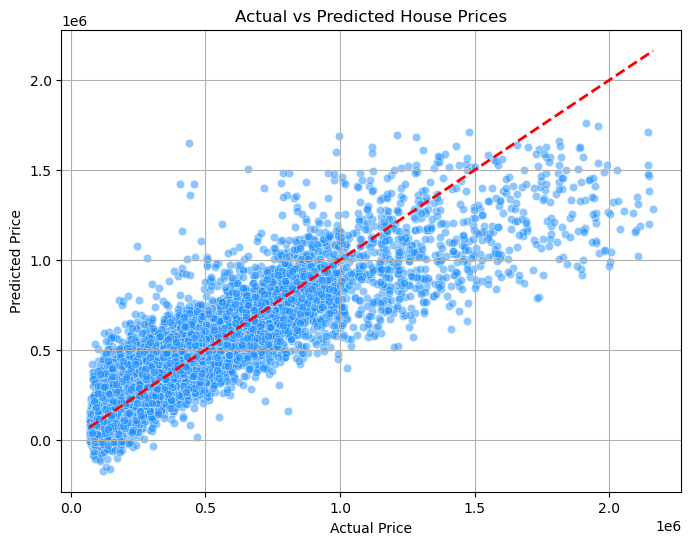

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # línea perfecta (y = y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()

#### Distribution of Prediction Error Ranges (%) 

In [38]:
error_pct = np.abs((y_test - y_pred) / y_test) * 100

bins = [-np.inf, 5, 10, 15, 20, 25, 50, 100, np.inf]
labels = ['<=5%', '<=10%', '<=15%', '<=20%', '<=25%', '<=50%', '<=100%', '>100%']

error_ranges = pd.cut(error_pct, bins=bins, labels=labels)

percentages = error_ranges.value_counts(normalize=True).sort_index() * 100

result_df = pd.DataFrame({
    'Error Range': percentages.index,
    'Percentage of Predictions': percentages.values
})

result_df

,Error Range,Percentage of Predictions
0,<=5%,11.441257
1,<=10%,11.680328
2,<=15%,11.168033
3,<=20%,9.842896
4,<=25%,8.613388
5,<=50%,27.267760
6,<=100%,14.822404
7,>100%,5.163934
